<a href="https://colab.research.google.com/github/jonesLevin/Data-Science-Competitions/blob/main/Title_Extraction_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Title Extraction in Lecture Slides Challenge by ITU AI/ML in 5G Challenge

Can you identify titles in presentation slides?

## About The Competition

We are providing still frame images extracted from webinar videos containing presentation slides with one or more titles. The objective of the challenge is to identify the title(s) in each slide that would be used to annotate the presentations.

Be aware that some training slide images may contain up to 4 titles at once, which is reflected in Train.csv ("Title1", "Title2", .., "Title4" columns). This is done to enrich your training with as much title samples as possible. Note that all our test images can only have a single title and you are expected to predict it.

The Train.csv and SampleSubmission.csv comprise the ID and Title columns where:
 - The labels in the ID columns correspond to the image labels without the leading zeros, i.e. image 000537.jpg in the train set corresponds to ID 537 in the Train.csv file.
 - The Title variable(s) represents the ground truth, i.e. title, of each slide/image in both the train and test set

In [1]:
!git clone https://github.com/msminhas93/DeepLabv3FineTuning.git

Cloning into 'DeepLabv3FineTuning'...
remote: Enumerating objects: 352, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 352 (delta 3), reused 9 (delta 3), pack-reused 340
Receiving objects: 100% (352/352), 4.09 MiB | 31.24 MiB/s, done.
Resolving deltas: 100% (24/24), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
  error: subprocess-exited-with-error
  
  × Running setup.py install for pytorch did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originat

#### Download title masks collection and unzip it to the cloned repository. 

In [1]:
!unzip -q ./drive/MyDrive/projects/Train.zip -d DeepLabv3FineTuning/

#### Training DeepLab model: our goal is to maximize test_f1_score
#### You may want to play with number of epochs, learning rate and loss function to get better results

In [2]:
%cd DeepLabv3FineTuning
from pathlib import Path

import torch
from sklearn.metrics import f1_score, roc_auc_score
from torch.utils import data

import datahandler
from model import createDeepLabv3
from trainer import train_model

# Create the deeplabv3 resnet101 model
model = createDeepLabv3()
model.train()


data_directory = '/content/DeepLabv3FineTuning'
# Create the experiment directory if not present
exp_directory = Path("DemoExp")
if not exp_directory.exists():
    exp_directory.mkdir()

epochs = 10 

# Specify the evaluation metrics
metrics = {'f1_score': f1_score, 'auroc': roc_auc_score}

# Create the dataloader
dataloaders = datahandler.get_dataloader_single_folder(
    data_directory, fraction=0.2, image_folder="Images", 
    mask_folder="Masks", batch_size=4)



# Specify the loss function
criterion = torch.nn.MSELoss(reduction='mean')

# Specify the optimizer with a lower learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
history = train_model(model, 
                criterion,
                dataloaders,
                optimizer,
                bpath=exp_directory,
                metrics=metrics,
                num_epochs=epochs)

# Save the trained model
torch.save(model, exp_directory / 'weights.pt')

# Terminate
exit()
%cd ../

/content/DeepLabv3FineTuning


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet101_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet101_coco-586e9e4e.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet101_coco-586e9e4e.pth
100%|██████████| 233M/233M [00:02<00:00, 84.5MB/s]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 8 worker pro

Epoch 1/10
----------


100%|██████████| 427/427 [22:09<00:00,  3.11s/it]


Train Loss: 0.0064


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 107/107 [02:34<00:00,  1.44s/it]

Test Loss: 0.0234
{'epoch': 1, 'Train_loss': 0.006420841906219721, 'Test_loss': 0.02341652289032936, 'Train_f1_score': 0.47658455899415714, 'Train_auroc': 0.9617841857989785, 'Test_f1_score': 0.676782913395851, 'Test_auroc': 0.9826311212308022}
Epoch 2/10
----------



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 427/427 [21:47<00:00,  3.06s/it]


Train Loss: 0.0088


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 107/107 [02:34<00:00,  1.44s/it]


Test Loss: 0.0058
{'epoch': 2, 'Train_loss': 0.008757476694881916, 'Test_loss': 0.005842836573719978, 'Train_f1_score': 0.6884543033744691, 'Train_auroc': 0.9871413079647076, 'Test_f1_score': 0.7323614644725721, 'Test_auroc': 0.9825276833873491}
Epoch 3/10
----------


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 427/427 [21:39<00:00,  3.04s/it]


Train Loss: 0.0112


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 107/107 [02:30<00:00,  1.40s/it]

Test Loss: 0.0131
{'epoch': 3, 'Train_loss': 0.011182856746017933, 'Test_loss': 0.01311158575117588, 'Train_f1_score': 0.7563605712247696, 'Train_auroc': 0.9910264677037446, 'Test_f1_score': 0.7224408565248355, 'Test_auroc': 0.9807359580586619}
Epoch 4/10
----------



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 427/427 [21:36<00:00,  3.04s/it]


Train Loss: 0.0063


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 107/107 [02:29<00:00,  1.40s/it]

Test Loss: 0.0040
{'epoch': 4, 'Train_loss': 0.00631575146690011, 'Test_loss': 0.003974640276283026, 'Train_f1_score': 0.7630905392429911, 'Train_auroc': 0.990879841345056, 'Test_f1_score': 0.7462467249037782, 'Test_auroc': 0.978072281042667}
Epoch 5/10
----------



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 427/427 [21:35<00:00,  3.03s/it]


Train Loss: 0.0031


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 107/107 [02:30<00:00,  1.41s/it]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Test Loss: 0.0145
{'epoch': 5, 'Train_loss': 0.003103493480011821, 'Test_loss': 0.014492771588265896, 'Train_f1_score': 0.7772779043729914, 'Train_auroc': 0.9918339290428949, 'Test_f1_score': 0.7142319812443629, 'Test_auroc': 0.9793147987953816}
Epoch 6/10
----------


100%|██████████| 427/427 [21:38<00:00,  3.04s/it]


Train Loss: 0.0053


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 107/107 [02:29<00:00,  1.40s/it]

Test Loss: 0.0280
{'epoch': 6, 'Train_loss': 0.005314704030752182, 'Test_loss': 0.027992187067866325, 'Train_f1_score': 0.8053737519297978, 'Train_auroc': 0.9927893380518411, 'Test_f1_score': 0.43046358961517006, 'Test_auroc': 0.88609829812665}
Epoch 7/10
----------



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 427/427 [21:37<00:00,  3.04s/it]


Train Loss: 0.0058


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 107/107 [02:30<00:00,  1.40s/it]

Test Loss: 0.0040
{'epoch': 7, 'Train_loss': 0.00575881265103817, 'Test_loss': 0.003954894375056028, 'Train_f1_score': 0.8270719959292447, 'Train_auroc': 0.9934392296309994, 'Test_f1_score': 0.7273943864850353, 'Test_auroc': 0.9722517790112881}
Epoch 8/10
----------



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 427/427 [21:37<00:00,  3.04s/it]


Train Loss: 0.0065


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 107/107 [02:29<00:00,  1.40s/it]

Test Loss: 0.0033
{'epoch': 8, 'Train_loss': 0.006531162187457085, 'Test_loss': 0.0032978795934468508, 'Train_f1_score': 0.8158902841688602, 'Train_auroc': 0.993244690094505, 'Test_f1_score': 0.7609436109081323, 'Test_auroc': 0.9772440391005792}
Epoch 9/10
----------



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 427/427 [21:34<00:00,  3.03s/it]


Train Loss: 0.0061


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 107/107 [02:29<00:00,  1.40s/it]

Test Loss: 0.0145
{'epoch': 9, 'Train_loss': 0.006109814625233412, 'Test_loss': 0.014543863013386726, 'Train_f1_score': 0.8387210888142435, 'Train_auroc': 0.9943177109892799, 'Test_f1_score': 0.5821800406210593, 'Test_auroc': 0.9746894731099752}
Epoch 10/10
----------



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 427/427 [21:37<00:00,  3.04s/it]


Train Loss: 0.0059


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 107/107 [02:29<00:00,  1.40s/it]


Test Loss: 0.0037
{'epoch': 10, 'Train_loss': 0.005883333273231983, 'Test_loss': 0.0036913349758833647, 'Train_f1_score': 0.844539828357722, 'Train_auroc': 0.9947829541299473, 'Test_f1_score': 0.8126796668905146, 'Test_auroc': 0.9750400115026231}
Training complete in 242m 29s
Lowest Loss: 0.003298
/content


## 2. Making the submission
#### Unzip the testset

In [5]:
!unzip -q ./drive/MyDrive/projects/Test.zip

#### Load finetuned deeplab model and define helper functions

In [2]:
import glob
import os
import json
import cv2    
import torch
import numpy as np
import pandas as pd

from torchvision import transforms  
from PIL import Image

deeplab_width = 768
deeplab_height = 432
deeplab = torch.load('DeepLabv3FineTuning/DemoExp/weights.pt')
deeplab.eval()
     

def boxify(out, boxes):
    return [ torch.mean(out[b[0]:b[1], b[2]:b[3]]).item()  for b in boxes ]      

def titlesegment(image, boxes):
    # Resize the frame to the training input size
    inputs = transforms.ToTensor()(Image.fromarray(image, mode="RGB"))
    inputs = inputs.reshape(1, *inputs.shape).to('cuda')
    
    with torch.set_grad_enabled(False):
        outputs = deeplab(inputs)
        out = outputs['out'][0][0]
        box_scores = boxify(out, boxes)
        return out, np.array(box_scores)
    
def occupation(boxes):
    area = lambda b: (b[1]-b[0]) * (b[3]-b[2])
    y1, y2 = min([b[0] for b in boxes ]), max([b[1] for b in boxes ])
    x1, x2 = min([b[2] for b in boxes ]), max([b[3] for b in boxes ])
    return 1.0 * sum([ area(b) for b in boxes ]) / area([y1, y2, x1, x2])

# Locates a paragraph of text with the highest probability 
# to be a slide title 
def pickonetitle(boxes, scores):
    if len(boxes) == 0:
        return []
        
    best_idx = np.argmax(scores)
    best = boxes[best_idx]

    candidates = { i for i, box in enumerate(boxes) 
        if abs(box['fontsize']-best['fontsize']) <= best['fontsize'] * 0.25 
            and scores[best_idx] - scores[i] < 0.6 }
    
    while occupation([ boxes[i]['bbox'] for i in candidates ]) < 0.75:
        combinations = [ candidates - {j} for j in candidates if j != best_idx ]
        candidates = max(combinations, 
            key=lambda comb: occupation([ boxes[j]['bbox'] for j in comb ]))
            
    title_boxes = [ boxes[i] for i in candidates ]
    return title_boxes

#### Now, we're going to use EasyOCR package to "read" the titles. Modern OCR solutions may still produce a handful of errors, which is why you're encouraged to apply a language model or alternative OCR model to fix possible misspelings. 

In [3]:
from shapely.geometry import Polygon, LineString

import easyocr
reader = easyocr.Reader(['en']) 

def sameline(a, b):
    return ((min(a['bbox'][1], b['bbox'][1]) - max(a['bbox'][0], b['bbox'][0]))
            / min(a['height'], b['height'])) >= 0.8
            
def isbelow(a, b):
    return not sameline(a, b) and a['bbox'][0] > b['bbox'][0]  
    
def isright(a, b):
    return sameline(a, b) and a['bbox'][2] > b['bbox'][2]  

def sort_boxes(boxes):              
    boxes_ = []
    for b in boxes:
        i = 0
        while i < len(boxes_) and (isbelow(b, boxes_[i]) or isright(b, boxes_[i])):
            i += 1
        boxes_.insert(i, b)
    return boxes_

def _norm_bbox(bbox):
    return  [ int(max(0, min([ p[1] for p in bbox ]))), 
              int(max([ p[1] for p in bbox ])), 
              int(max(0, min([ p[0] for p in bbox ]))), 
              int(max([ p[0] for p in bbox ])) ]

def process_ocr(ocr_results):
    items = []
    for bbox, text, conf in ocr_results:
        if text == '' or conf <= 0:
            continue  
        if not isinstance(bbox, list):
            bbox = bbox.tolist()
        item = {}
        item['width'] = LineString(bbox[0:2]).length
        item['height'] = LineString(bbox[1:3]).length
        item['area'] = item['width'] * item['height']
        item['fontsize'] = 1.0 * item['width'] / len(text)
        item['bbox'] = _norm_bbox(bbox)            
        item['text'] = text
        item['conf'] = float(conf)
        items.append(item)
    return items     

def read_text(img):
    return process_ocr(reader.readtext(img))

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

### Visualizing some predictions and their bounding boxes

'Test slide #33'

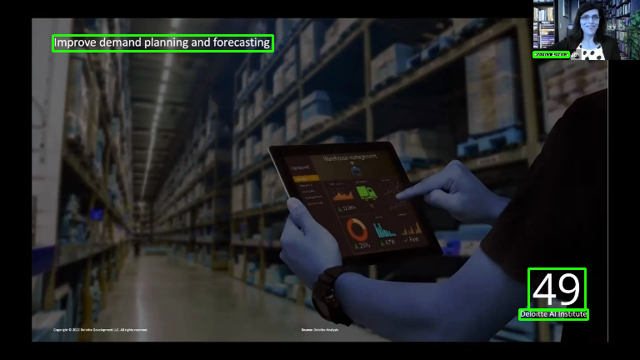

,width,height,area,fontsize,bbox,text
0,264.0,19.0,5016.0,6.769231,"[42, 61, 63, 327]",Improve demand planning and forecasting
1,42.0,6.0,252.0,5.250000,"[62, 68, 640, 682]",Bcaaenin
2,68.0,50.0,3400.0,34.000000,"[322, 372, 634, 702]",49
3,82.0,12.0,984.0,3.904762,"[371, 383, 623, 705]",Delcitte Al Institute


In [57]:
from IPython.display import display, JSON, Image as IImage

def draw_boxes(frame, boxes):
    for box in boxes:
        frame = cv2.rectangle(frame, (box[2], box[0]), (box[3], box[1]), (36,255,12), 2)
    return frame

# Load some test image and read the text on it
slide_ = cv2.imread('/content/Images_Test/Id_zydc6fp25b.jpg')

textboxes_ = read_text(slide_)

textdata_ = pd.DataFrame(list(textboxes_))
del textdata_['conf']
             
slide_debug_ = draw_boxes(slide_, [ box['bbox'] for box in textboxes_ ])

display(f"Test slide #33", 
    Image.fromarray(slide_debug_).resize((640,360)), textdata_.head(5))

'Test slide #33 (segmentation output)'

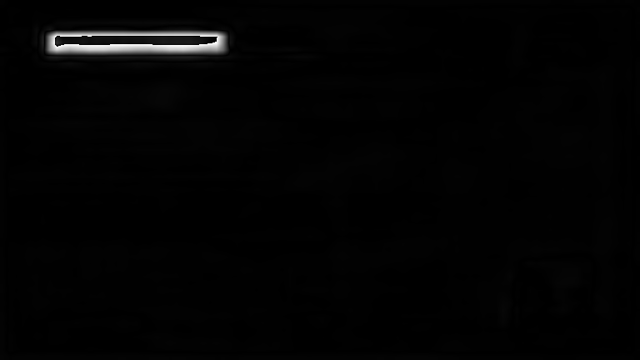

,width,height,area,fontsize,bbox,text,score
0,202.0,16.0,3232.0,6.121212,"[43, 59, 63, 265]",Detect potential security threats,0.994051
1,42.0,6.0,252.0,5.250000,"[62, 68, 640, 682]",Bcnaenin,-0.002793
2,70.0,50.0,3500.0,35.000000,"[322, 372, 632, 702]",76,-0.006104
3,82.0,12.0,984.0,3.904762,"[371, 383, 623, 705]",Deloitte Al Institute,-0.001332


In [7]:
out, scores = titlesegment(slide_, [ box['bbox'] for box in textboxes_ ])
out_mask = (np.abs(out.cpu().numpy())*255).astype(np.uint8)

textdata_['score'] = scores

display(f"Test slide #33 (segmentation output)", Image.fromarray(out_mask).resize((640,360)), textdata_.head(5))

In [33]:
images = sorted(glob.glob('Images_Test/*.jpg'))
result = []

for path in images:
    image = cv2.imread(path)
    textboxes = read_text(image)

    out, scores = titlesegment(image, [ box['bbox'] for box in textboxes ])
    titleboxes = pickonetitle(textboxes, scores)
    
    # Sort text boxes as you would read it in English: from top to bottom
    # and from left to right
    titleboxes = sort_boxes(titleboxes)
    title = ' '.join(box['text'] for box in titleboxes)    
    
    image_id = path.split('/')[-1]
    result.append([image_id, title])


In [32]:
images[0].split('/')[-1]

'Id_06cra35n6n.jpg'

In [34]:
df = pd.DataFrame.from_records(result, columns=['ID','Title'])
df

,ID,Title
0,Id_06cra35n6n.jpg,Bcnaenin
1,Id_08bjq60t4q.jpg,Daniel
2,Id_0g2lwbt3sa.jpg,USMILE Part 2: Convection DL instabilities & s...
3,Id_0h1arzmj2p.jpg,"Take any ""standard"" black box CNN:"
4,Id_0khgx7z8tk.jpg,Predict; prevent and detect insurance fraud
...,...,...
285,Id_zp77iny60p.jpg,Monitor environmental changes and measure ener...
286,Id_zrs2rtf33n.jpg,The Safe System Pillars
287,Id_zvhdc5e9ra.jpg,Stop explaining black box machine learning mod...
288,Id_zvhpkbv4rk.jpg,Interactive Machines


In [36]:
df.to_csv('Submission.csv', index=False)